#### **Battaglia Profile**

These lines of code give the Battaglia profile for the halo model once you set all the needed parameters.

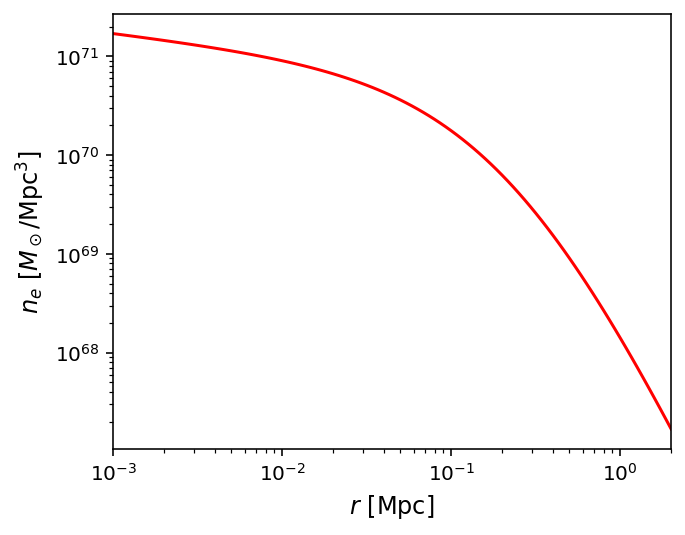

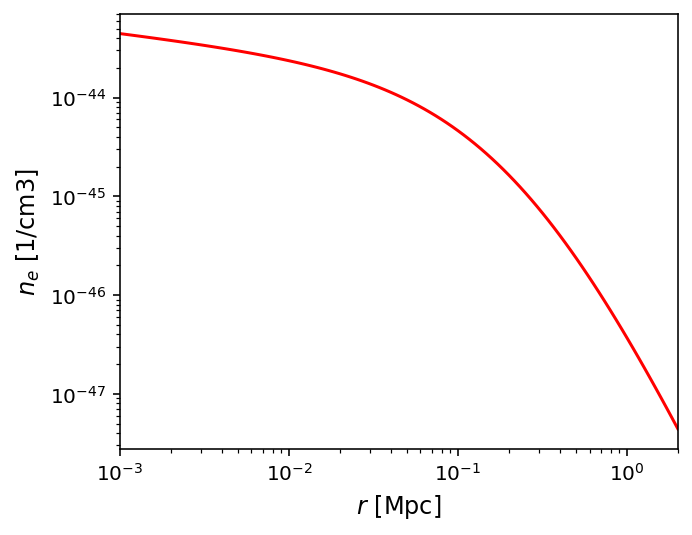

In [31]:
import astropy.units as u
import astropy.constants as const
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline



####################################
# Natural unit conversions
####################################

#We express all the quantities in eV
GeV = 1 
MeV = 1e-3
keV = 1e-6
eV  = 1e-9
meV = 1e-12 

#Units:
Kg     = 5.609 * 1e35 * eV
meter  = 5.07 * 1e6 * eV**-1
cm     = 1e-2 * meter
Km     = 1e3 * meter
Mpc    = 1.564 * 1e29 * eV**-1
second = 1.5192 * 1e15 * eV**-1
Hz     = 1/second


Gauss  = 1.95 * 1e-2 * eV**2
Joule  = 6.242 * 1e18 * eV  

#Constants
AlphaEM           = 1/137
H_0               = 67.66 * Km/second / Mpc
ElementaryCharge  = np.sqrt(4 * np.pi * AlphaEM);
mass_electron     = 9.109 * 1e-31 * Kg
mass_proton       = 1.672 * 1e-27 * Kg
numerical_density = 1/cm**3


####################################
# Defining Battaglia's profile and getting ne from it
####################################

def get_ne_battaglia(r, M200c, R200c, z, rho_critz, Omega_b, Omega_m,
                     param_dict=None):
       """
       Computes Battaglia profile as a function of radius. 

       Parameters:
           r: Radius in Mpc
           M200c: M200c in Msun
           R200c: R200c in Mpc
           z: Redshift
           rho_crit_z: Critical density in Msun/Mpc^3
           param_dict: Optional parameters for profile

       Returns:
           Electron number density profile in (1/Mpc**3)

       """

       # Unit conversion
       m_p = 8.411856872862986e-58 # Proton mass in units of Msun
       if param_dict is None:
           # Get Battaglia profile parameters at appropriate redshift
           rho0  = 4000. * (M200c/1e14)**0.29    * (1.+z)**(-0.66)
           alpha = 0.88  * (M200c/1e14)**(-0.03) * (1.+z)**0.19
           beta  = 3.83  * (M200c/1e14)**0.04    * (1.+z)**(-0.025)
           gamma = -0.2

       else:
           rho0  = param_dict['rho0']
           alpha = param_dict['alpha']
           beta  = param_dict['beta']
           gamma = param_dict['gamma']

       x = 2*r/R200c    
       fb = Omega_b/Omega_m
    
       rho_gas = fb*rho_critz*rho0 * (x**gamma) * ((1.+x**alpha)**(-(beta+gamma)/alpha))
       ne_prof = (1+0.76)/(2*m_p)*rho_gas 

       return ne_prof

# Set some parameters (similar to Planck best-fit cosmo)
Omega_b = 0.049
Omega_m = 0.3175
h = 0.6711
H0 = 100*h*u.km/u.s/u.Mpc

z = 0 # redshift
rho_critz = (3*H0**2/(8*np.pi*const.G)).to(u.Msun/u.Mpc**3).value # Msun/Mpc^3


# Halo settings
M200c = 10**13.5 # Msun
R200c = 0.5 # Mpc

# Compute profile
r_thr = np.logspace(-3, np.log10(2), 100) # radius in Mpc

ne = get_ne_battaglia(r_thr, M200c, R200c, z, rho_critz, Omega_b, Omega_m)


########################################################################
# Make plot
########################################################################
plt.figure(figsize=(5,4))
plt.plot(r_thr, ne, color='r')
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-3, 2)
plt.xlabel(r"$r~[{\rm Mpc}]$", fontsize=12)
plt.ylabel(r"$n_e~[M_\odot/{\rm Mpc}^3]$", fontsize=12)
plt.show()

########################################################################
# Make plot in eV (converting to 1/cm^3 and then to eV^3)
########################################################################
ne = (ne/u.Mpc**3).to(1/u.cm**3).value * numerical_density # First conversion units with astropy
plt.figure(figsize=(5,4))
plt.plot(r_thr, ne, color='r')
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-3, 2)
plt.xlabel(r"$r~[{\rm Mpc}]$", fontsize=12)
plt.ylabel(r"$n_e~[1/{\rm cm}3]$", fontsize=12)
plt.show()



In [33]:
########################################
# Specify parameters of the model
########################################

dark_photon = False #Set False if you want to work with axion

m_a   = 3e-13 * eV# Axion mass in eV
g_agg = 1e-10 * (GeV)**-1 # Axion photon-coupling in (GeV)^-1
nu    = 145 * 10**9 * Hz # Frequency in Hz 
omega = 2.*np.pi*nu # Angular frequency in Hz

if dark_photon:
    eps   = 1e-5 #photon-dark photon coupling “natural” values in the range 1e-13 - 10e-2 eV 

In [34]:
########################################
# Specify functions Delta_a and Delta_parallel
########################################

def Delta_a(r):
    """
    Axion mass term
    Delta_a = -m_a^2/(2*omega)
    """
    return m_a**2/(2*omega) 

def m2_g(r):
    """
    Effective mass of the photon
    acquired by scattering with free electrons
    """
    return   ElementaryCharge**2 * 1/mass_electron * ne #in eV units 


def Delta_parallel(r):
    """
    Photon mass term
    Delta_parallel = -m^2_\gamma(z)/2\omega
    """
    return m2_g(r) /(2* omega)

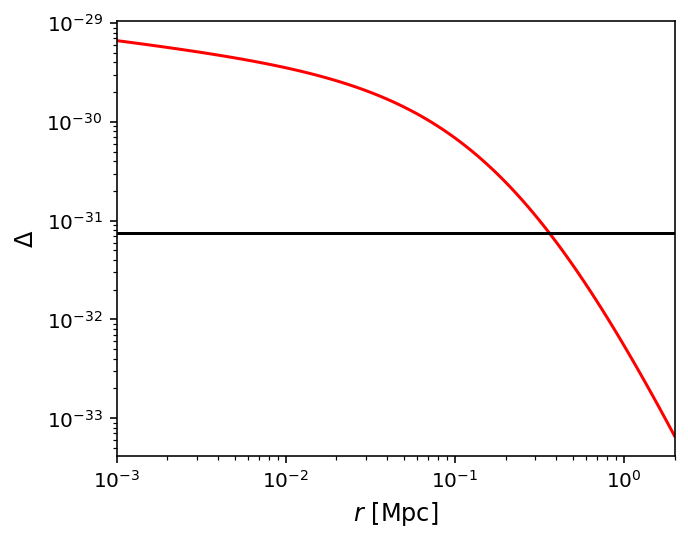

In [38]:
plt.figure(figsize=(5,4))
plt.plot(r_thr, Delta_parallel(r_thr), color='r')
plt.plot(r_thr, Delta_a(r_thr)*np.ones_like(r_thr), color='k')
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-3, 2)
plt.xlabel(r"$r~[{\rm Mpc}]$", fontsize=12)
plt.ylabel(r"$ \Delta$", fontsize=12)
plt.show()